tb - 6/30/2022 - The goal of this notebook is to select the simple analytic models trained on both climates (see notebook 092) using a simple (performance,complexity) space.

# Initialization and imports

## Import libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import numpy as np
import pickle as pkl

In [2]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

In [3]:
cmap0 = cm.get_cmap('Paired', 6)

## Define paths of polynomial fits

In [4]:
save_folder = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/Polynomial_Fits/'

In [5]:
path_prefix = save_folder+'2022_06_30_dicQT_'

In [6]:
path_array = ['localBF','localCI','BF','CI','local','all']

In [7]:
N_degree = 4
N_sample = 4

In [8]:
dic = {}

In [9]:
for isample in range(N_sample):
    dic[isample] = {}
    for ipath,path in enumerate(path_array):
        dic[isample][ipath] = pkl.load(open(path_prefix+path+
                                            '_isample_'+str(isample)+'.pkl','rb'))

FileNotFoundError: [Errno 2] No such file or directory: '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/Polynomial_Fits/2022_06_30_dicQT_all_isample_3.pkl'

In [16]:
marker_array = ['o','*','p','P']

localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all


KeyError: 5

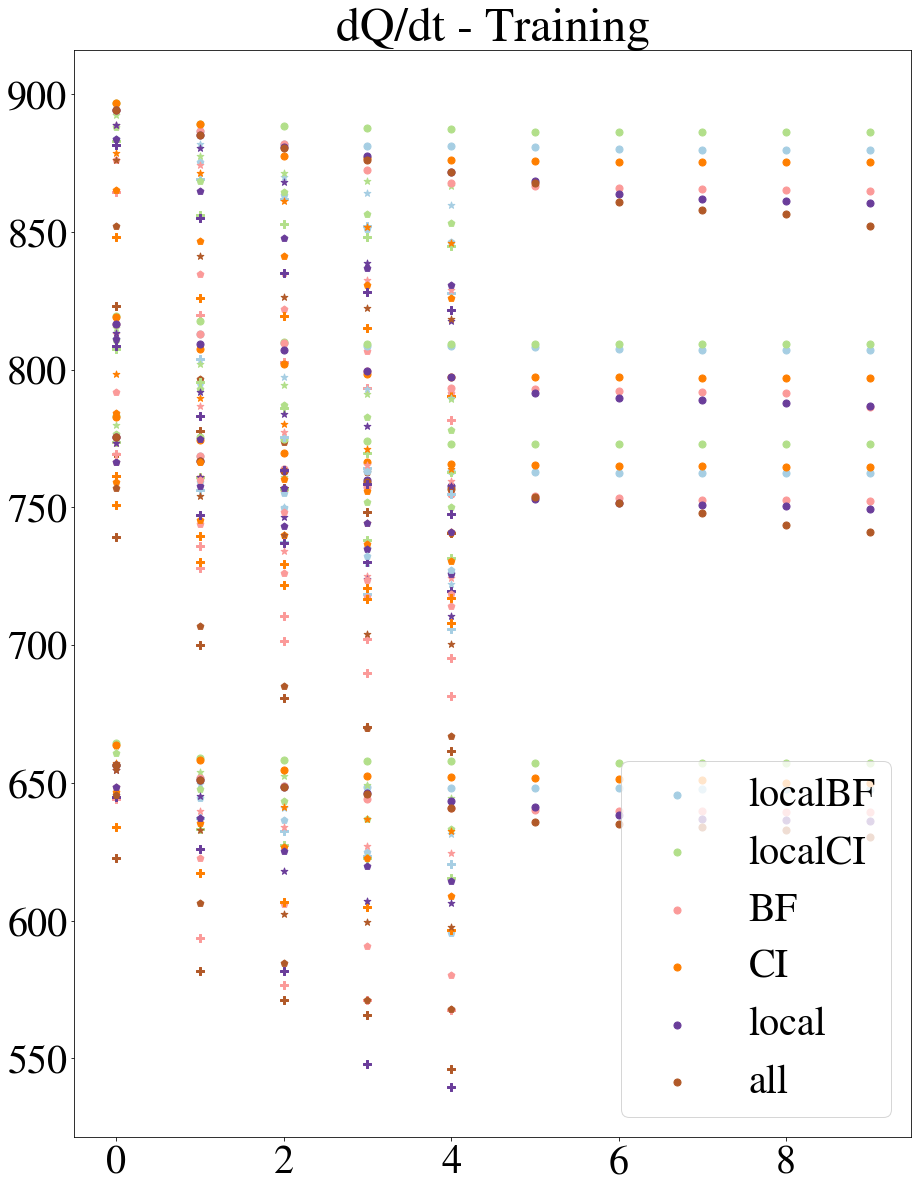

In [17]:
fig, ax = plt.subplots(1,1,figsize=(15,20))

plt.title('dQ/dt - Training')
for isample in range(N_sample):
    for ipath,path in enumerate(path_array):
        print(path)
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                if isample==0 and degree==1 and n_variables==0: label = path;
                else: label = ''
                ax.scatter(n_variables,
                           dic[isample][ipath]['Qfits'][degree]\
                           ['Number of variables %d'%(n_variables+1)]['mse_train'],
                           s=siz/2,color=cmap0(ipath),marker=marker_array[degree-1],
                          label=label)
    if isample==0: plt.legend()

KeyError: 5

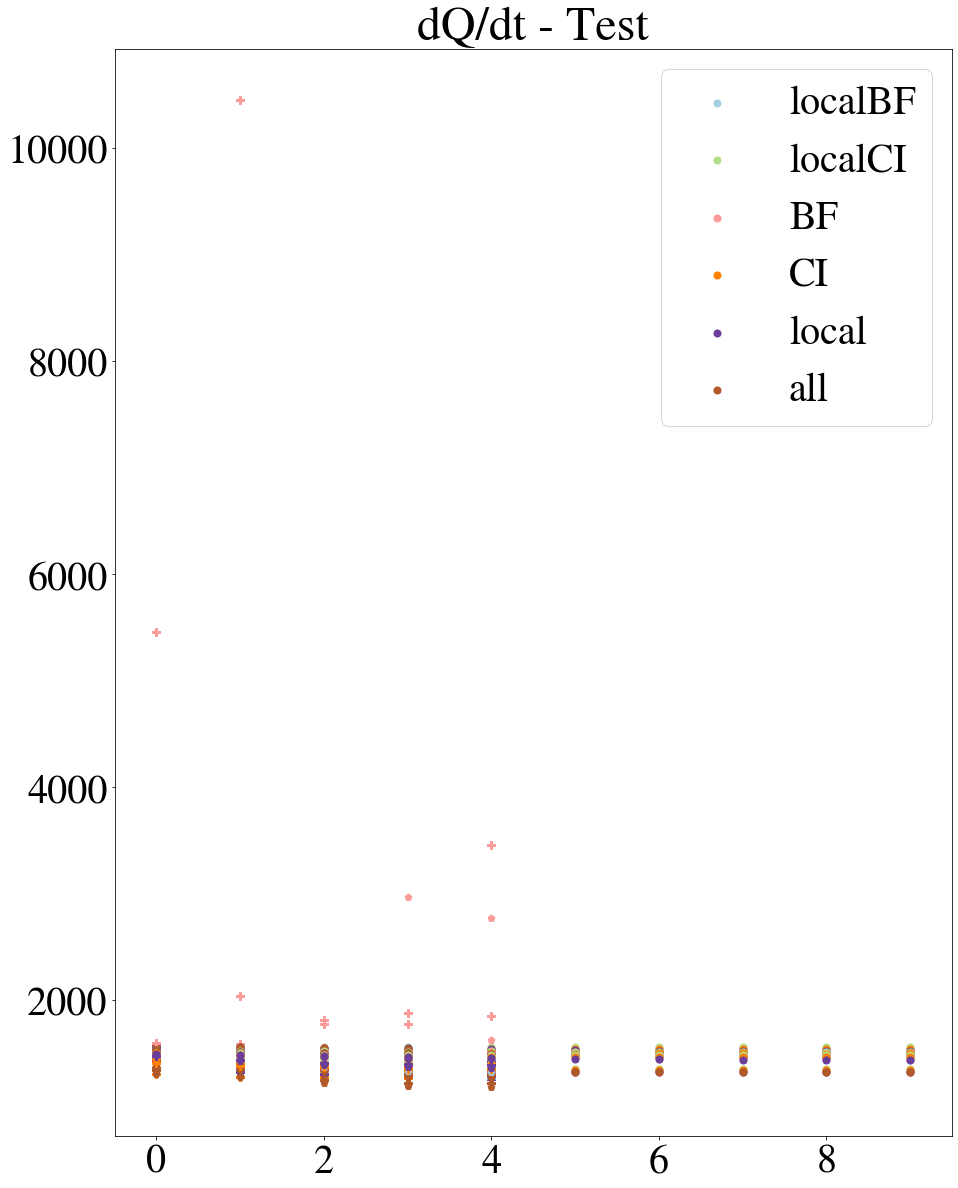

In [98]:
fig, ax = plt.subplots(1,1,figsize=(15,20))

plt.title('dQ/dt - Test')
for isample in range(N_sample):
    for ipath,path in enumerate(path_array):
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                if isample==0 and degree==1 and n_variables==0: label = path;
                else: label = ''
                tmse = dic[isample][ipath]['Qfits'][degree]['Number of variables %d'%(n_variables+1)]['mse_test']
                ax.scatter(n_variables,(tmse['m4K']+tmse['ref']+tmse['p4K'])/3,
                s=siz/2,color=cmap0(ipath),marker=marker_array[degree-1],label=label)
    if isample==0: plt.legend()

localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all


KeyError: 5

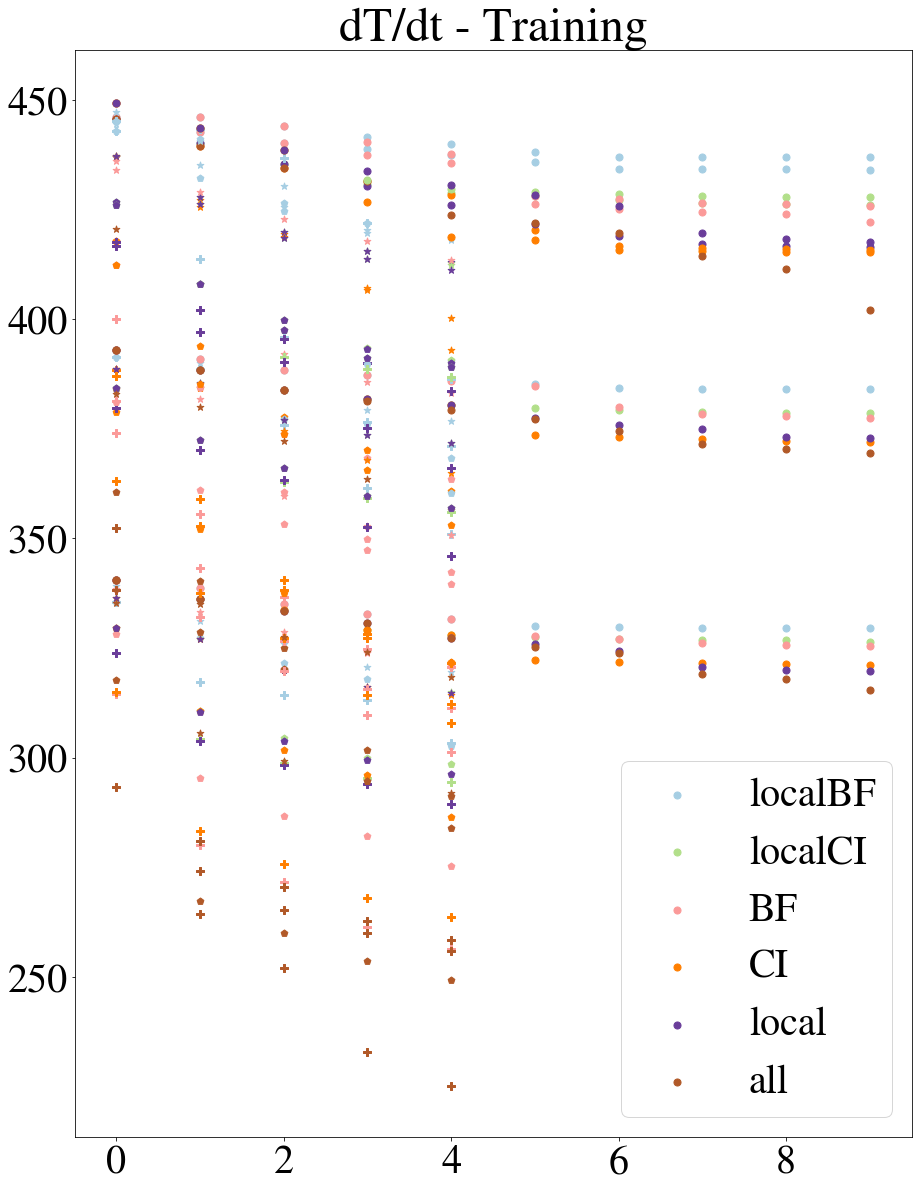

In [19]:
fig, ax = plt.subplots(1,1,figsize=(15,20))

plt.title('dT/dt - Training')
for isample in range(N_sample):
    for ipath,path in enumerate(path_array):
        print(path)
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                if isample==0 and degree==1 and n_variables==0: label = path;
                else: label = ''
                ax.scatter(n_variables,
                           dic[isample][ipath]['Tfits'][degree]\
                           ['Number of variables %d'%(n_variables+1)]['mse_train'],
                           s=siz/2,color=cmap0(ipath),marker=marker_array[degree-1],
                          label=label)
    if isample==0: plt.legend()

KeyError: 5

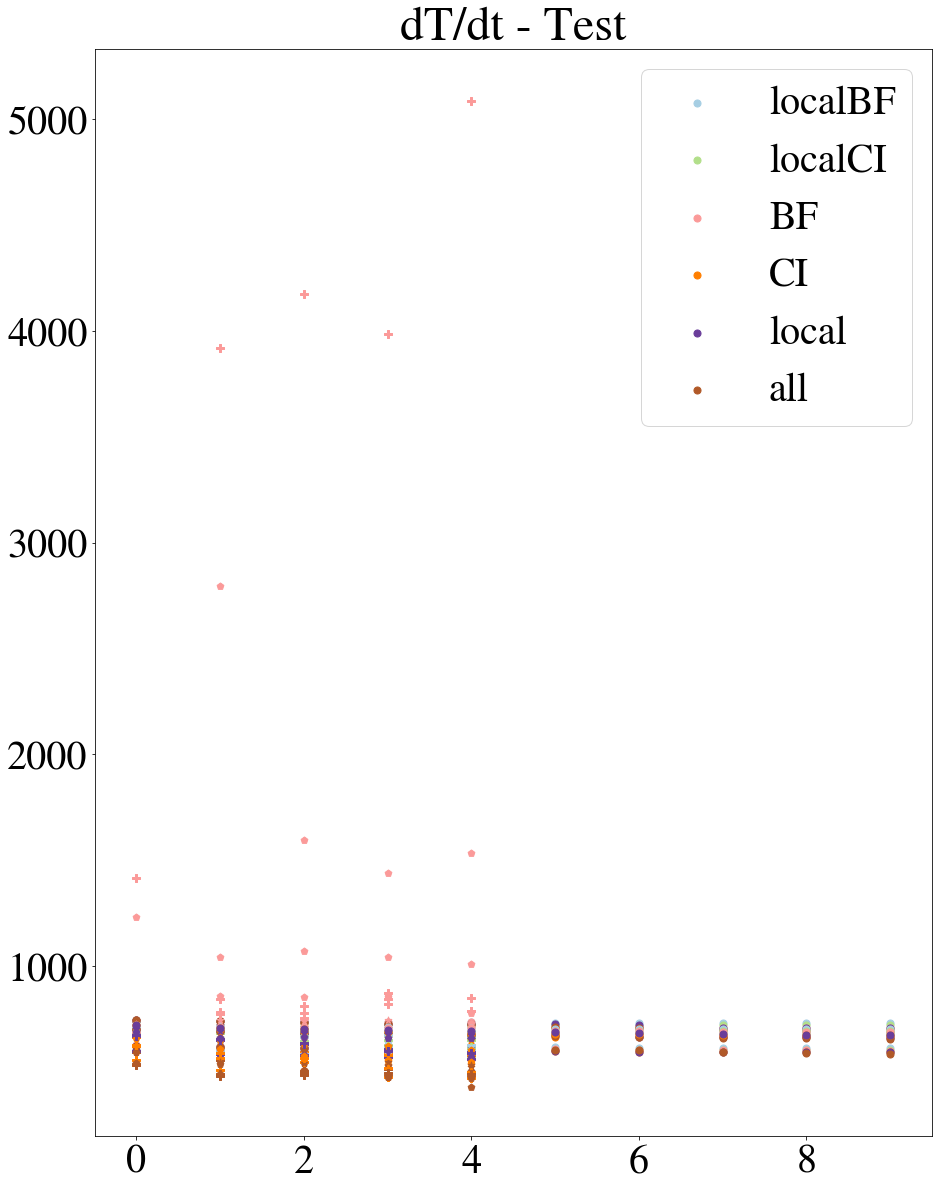

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,20))

plt.title('dT/dt - Test')
for isample in range(N_sample):
    for ipath,path in enumerate(path_array):
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                if isample==0 and degree==1 and n_variables==0: label = path;
                else: label = ''
                tmse = dic[isample][ipath]['Tfits'][degree]['Number of variables %d'%(n_variables+1)]['mse_test']
                ax.scatter(n_variables,(tmse['m4K']+tmse['ref']+tmse['p4K'])/3,
                s=siz/2,color=cmap0(ipath),marker=marker_array[degree-1],label=label)
    if isample==0: plt.legend()

# Find top terms found by SFS for each model

## Calculation

In [21]:
key_to_drop = ['LR_Bias','mse_train','mse_test']

In [22]:
termsT = {}; termsQ = {}
for ipath,path in enumerate(path_array):
    termsT[path] = {}; termsQ[path] = {}

In [23]:
for isample in range(N_sample):
    for ipath,path in enumerate(path_array):
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                # Eliminate keys that are not variables
                tmp = dic[isample][ipath]['Tfits'][degree]\
                ['Number of variables %d'%(n_variables+1)].copy()
                for key in key_to_drop: tmp.pop(key)
                # Add them to termsT if it doesn't already have them
                # In all cases, assign coefficient and add occurence
                for var in tmp.keys():
                    if var not in termsT[path]: 
                        termsT[path][var] = {};
                        termsT[path][var]['count'] = 0
                        termsT[path][var]['coef'] = 0
                    termsT[path][var]['coef'] = (tmp[var]+\
                    termsT[path][var]['count']*termsT[path][var]['coef'])/\
                    (termsT[path][var]['count']+1)
                    termsT[path][var]['count'] += 1

KeyError: 5

In [24]:
for isample in range(N_sample):
    for ipath,path in enumerate(path_array):
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                # Eliminate keys that are not variables
                tmp = dic[isample][ipath]['Qfits'][degree]\
                ['Number of variables %d'%(n_variables+1)].copy()
                for key in key_to_drop: tmp.pop(key)
                # Add them to termsQ if it doesn't already have them
                # In all cases, assign coefficient and add occurence
                for var in tmp.keys():
                    if var not in termsQ[path]: 
                        termsQ[path][var] = {};
                        termsQ[path][var]['count'] = 0
                        termsQ[path][var]['coef'] = 0
                    termsQ[path][var]['coef'] = (tmp[var]+\
                    termsQ[path][var]['count']*termsQ[path][var]['coef'])/\
                    (termsQ[path][var]['count']+1)
                    termsQ[path][var]['count'] += 1

KeyError: 5

In [25]:
termT = {}; termQ = {}

In [26]:
for ipath,path in enumerate(path_array):
    termT[path] = {}
    tmp = []
    nam = []
    val = []
    for var in termsT[path].keys():
        tmp.append(termsT[path][var]['count'])
        nam.append(var)
        val.append(termsT[path][var]['coef'])
    arg0 = np.argsort(tmp)[::-1]
    termT[path]['variables'] = np.array(nam)[arg0]
    termT[path]['coef'] = np.array(val)[arg0]
    termT[path]['count'] = np.array(tmp)[arg0]

In [27]:
for ipath,path in enumerate(path_array):
    termQ[path] = {}
    tmp = []
    nam = []
    val = []
    for var in termsQ[path].keys():
        tmp.append(termsQ[path][var]['count'])
        nam.append(var)
        val.append(termsQ[path][var]['coef'])
    arg0 = np.argsort(tmp)[::-1]
    termQ[path]['variables'] = np.array(nam)[arg0]
    termQ[path]['coef'] = np.array(val)[arg0]
    termQ[path]['count'] = np.array(tmp)[arg0]

## Bar plot visualization

In [88]:
Models = ['localBF','localCI','BF','CI','local','all']

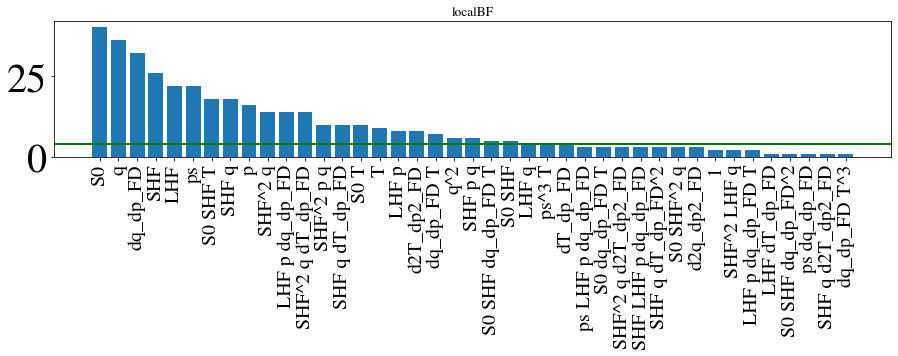

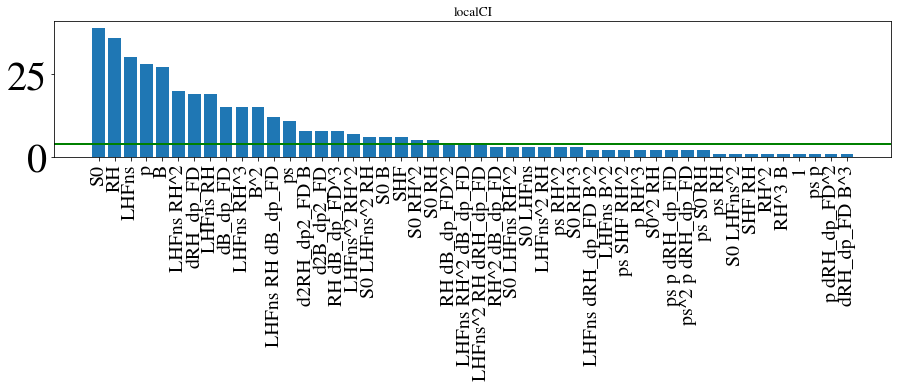

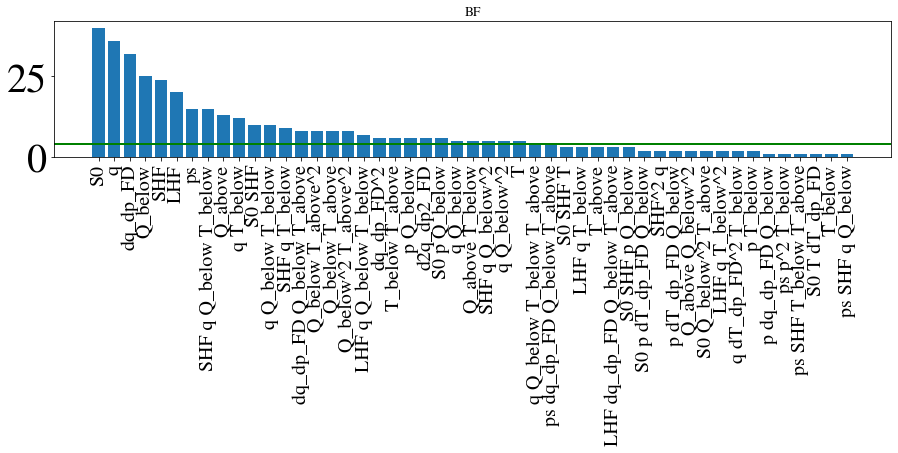

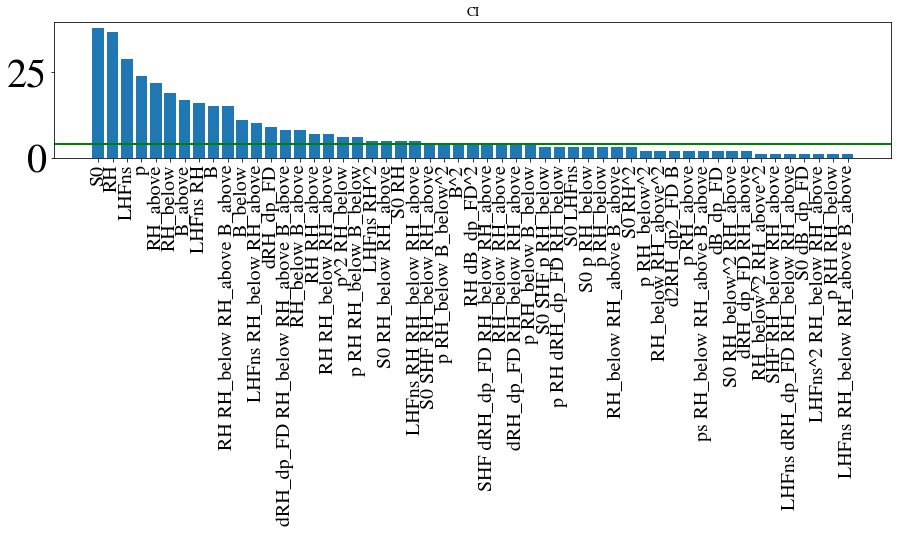

In [90]:
for i in range(4):
    fig, ax = plt.subplots(1,1,figsize=(15,2.5))
    plt.bar(termT[Models[i]]['variables'],
              termT[Models[i]]['count'])
    plt.axhline(y=4,color='g')
    plt.xticks(rotation=90);
    plt.xticks(fontsize=fz/2);
    plt.title(Models[i],fontsize=fz/3)

In [91]:
# for i in range(4):
#     fig, ax = plt.subplots(1,1,figsize=(15,2.5))
#     plt.bar(termT[Models[i]]['variables'],
#             termT[Models[i]]['coef'])
#     plt.axhline(y=4,color='g')
#     plt.xticks(rotation=90);
#     plt.xticks(fontsize=fz/2);
#     plt.title(Models[i],fontsize=fz/3)

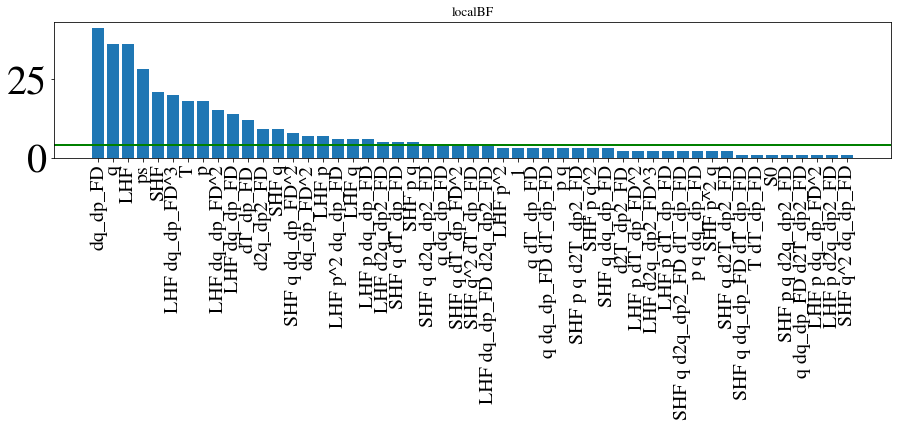

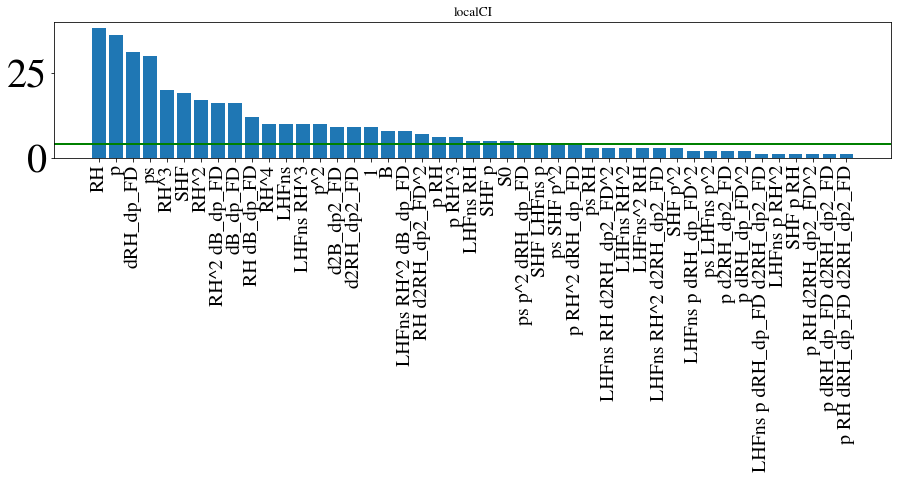

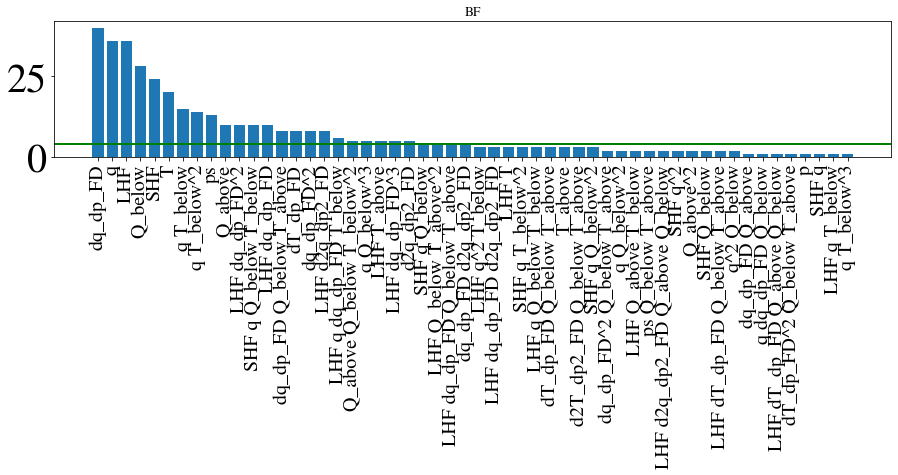

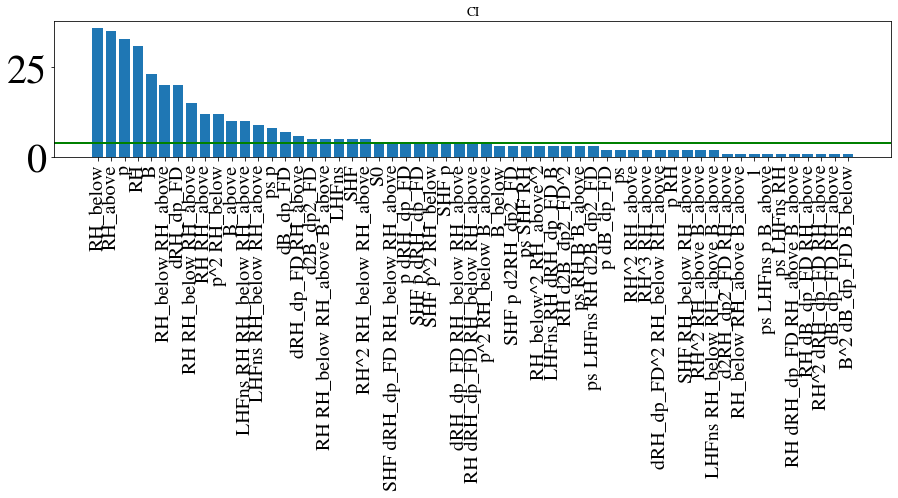

In [84]:
for i in range(4):
    fig, ax = plt.subplots(1,1,figsize=(15,2.5))
    plt.bar(termQ[Models[i]]['variables'],
              termQ[Models[i]]['count'])
    plt.axhline(y=4,color='g')
    plt.xticks(rotation=90);
    plt.xticks(fontsize=fz/2);
    plt.title(Models[i],fontsize=fz/3)

In [92]:
# Save Variable Count for Future use
path_to_save = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/Polynomial_Fits/'

In [93]:
data = {"Terms_Moisture":termQ,"Terms_Temperature":termT}

In [96]:
pkl.dump(data,open(path_to_save+'2022_07_07_Terms_Count.pkl','wb'))

# Find top models on test set

In [33]:
path_array_red = ['localBF','localCI','BF','CI']

In [34]:
Best_Models = {}

In [87]:
for ipath,path in enumerate(path_array_red):
    Best_Models[path] = {}
    
    for degree in np.arange(1,N_degree+1):
        Best_Models[path][degree] = {}
        
        if degree==1: Nvar = 10
        else: Nvar = 5
        
        mse_tosort = np.zeros((N_sample*Nvar))
        
        for isample in range(N_sample):
            
            for n_variables in range(Nvar):
                
                tmp = dic[isample][ipath]['Tfits'][degree]\
                ['Number of variables %d'%(n_variables+1)]['mse_test']
                mse_tosort[Nvar*isample+n_variables] = (tmp['m4K']+tmp['ref']+tmp['p4K'])/3
                
        order = np.argsort(mse_tosort)
        n_variables_sol = np.mod(order[0],Nvar)
        isample_sol = int((order[0]-n_variables_sol)/Nvar)
        Best_Models[path][degree] = dic[isample_sol][ipath]['Tfits'][degree]\
                ['Number of variables %d'%(n_variables_sol+1)]